<a href="https://colab.research.google.com/github/nehat005/Tensorflow_coding/blob/main/TrafficSignals_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from skimage import data, io, filters
import matplotlib.pyplot as plt

In [4]:
!wget -cq https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
!wget -cq https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip


In [5]:
!unzip BelgiumTSC_Training.zip
!unzip BelgiumTSC_Testing.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/00036/01285_00000.ppm  
  inflating: Training/00036/01285_00001.ppm  
  inflating: Training/00036/01285_00002.ppm  
  inflating: Training/00036/01457_00000.ppm  
  inflating: Training/00036/01457_00001.ppm  
  inflating: Training/00036/01457_00002.ppm  
  inflating: Training/00036/01606_00000.ppm  
  inflating: Training/00036/01606_00001.ppm  
  inflating: Training/00036/01606_00002.ppm  
  inflating: Training/00036/01687_00000.ppm  
  inflating: Training/00036/01687_00001.ppm  
  inflating: Training/00036/01687_00002.ppm  
  inflating: Training/00036/GT-00036.csv  
   creating: Training/00037/
  inflating: Training/00037/00099_00000.ppm  
  inflating: Training/00037/00099_00001.ppm  
  inflating: Training/00037/00099_00002.ppm  
  inflating: Training/00037/00100_00000.ppm  
  inflating: Training/00037/00163_00000.ppm  
  inflating: Training/00037/00163_00001.ppm  
  inflating: Training/00037/00163_00002.ppm  
  i

# Loading and Exploring The Data


In [6]:
def load_data(dataset_path):
  # print(dataset_path)
  directories = sorted([directory for directory in os.listdir(dataset_path)
           if os.path.isdir(os.path.join(dataset_path, directory))])
  images = []
  labels = []
  
  for dir in directories: # dir is a string here
    #from string to os directory:
    # print(dir)
    dir_ = os.path.join(dataset_path, dir)
    for files in os.listdir(dir_):
      if files.endswith(".ppm"): 
        images.append(io.imread(os.path.join(dir_, files)))
        labels.append(int(dir))

  return images, labels
  


ROOT = '/content/'
train_path = os.path.join(ROOT, "Training/")
test_path = os.path.join(ROOT, "Testing")
images, labels = load_data(train_path)


In [21]:
from skimage import transform

images28 = [transform.resize(image, (28,28)) for image in images]
# print(images28[0].shape, images28[1].shape)
images28 = np.array(images28)
print(images28.shape)

(4575, 28, 28, 3)


(4575, 28, 28)


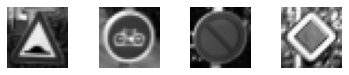

In [24]:
from skimage.color import rgb2gray

images28_rgb = np.stack([rgb2gray(images28[i]) for i in range(len(images28))])
print(images28_rgb.shape)
traffic_signs = [28, 2390, 3000, 4574]

for i in range(len(traffic_signs)):
  plt.subplot(1, 4, i+1)
  plt.axis('off')
  plt.imshow(images28_rgb[traffic_signs[i]], cmap = 'gray')
  plt.subplots_adjust(wspace = 0.5)

plt.show()

#Modelling the classifier

In [76]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(62, activation="relu"))
# model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01), loss = tf.keras.losses.CategoricalCrossentropy())


In [77]:
model.fit(images28_rgb, np.array(labels), epochs = 500)

Train on 4575 samples
Epoch 1/500
4575/4575 [==============================] - 0s 91us/sample - loss: 13160.1036
Epoch 2/500
4575/4575 [==============================] - 0s 54us/sample - loss: 12820.1698
Epoch 3/500
4575/4575 [==============================] - 0s 53us/sample - loss: 12819.0075
Epoch 4/500
4575/4575 [==============================] - 0s 56us/sample - loss: 12818.6528
Epoch 5/500
4575/4575 [==============================] - 0s 55us/sample - loss: 12818.4936
Epoch 6/500
4575/4575 [==============================] - 0s 52us/sample - loss: 12818.4203
Epoch 7/500
4575/4575 [==============================] - 0s 53us/sample - loss: 12818.3327
Epoch 8/500
4575/4575 [==============================] - 0s 51us/sample - loss: 12818.2954
Epoch 9/500
4575/4575 [==============================] - 0s 52us/sample - loss: 12818.2608
Epoch 10/500
4575/4575 [==============================] - 0s 52us/sample - loss: 12818.2360
Epoch 11/500
4575/4575 [==============================] - 0s 52us/s

In [78]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         multiple                  0         
_________________________________________________________________
dense_29 (Dense)             multiple                  48670     
Total params: 48,670
Trainable params: 48,670
Non-trainable params: 0
_________________________________________________________________
